# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Nick Demski.</p>
# <p style="text-align: right;"> &#9989; Demskini.</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/Demskini/CMSE202-fs25-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [14]:
import pandas as pd 

df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.head())
print(df.columns)
print("df patient total -",len(df))


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
df patient total - 100000


How many patients are in this dataset? What are features of the patients?

<font size=6 color="#009600">&#9998;</font> 100000 patients. features are 'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [15]:
'''df['gender'] = df['gender'].str.strip().str.title()
df['smoking_history'] = df['smoking_history'].str.strip().str.lower()

#changing gender to numerical values
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

#changing smoking history to numerical values 
df['smoking_history'] = df['smoking_history'].map({
    'never': 0,
    'No Info': 1,
    'former': 2,
    'current': 3,
    'not current': 4,
    'ever': 5
})
#changing diabetes from 0,1 to respectivly -1,+1
df['diabetes'] = df['diabetes'].map({0: -1, 1: +1})

used chat gpt 4.0mini to teach me how to use .map for adjusting values to be numerical,
as well as changing numerical values to different values.

"How do I change values that a words in a dataframe to be numerical in python. 4/23/25"

print(df[['gender', 'smoking_history', 'diabetes']].head())
print(df.isnull().sum())  # Check for any NaNs introduced during mapping

 I was having "errors" because everything was nan, I pasted the issue into chat gpt, above is the outcome
4/23/25

#Chat gpt recomended useing "strip" functions to clean the data.

#TRASHING ALL CODE ABOVE... ONLY KEEPING HERE TO SHOW MY STRUGGLE ... 
'''

'df[\'gender\'] = df[\'gender\'].str.strip().str.title()\ndf[\'smoking_history\'] = df[\'smoking_history\'].str.strip().str.lower()\n\n#changing gender to numerical values\ndf[\'gender\'] = df[\'gender\'].map({\'Male\': 0, \'Female\': 1, \'Other\': 2})\n\n#changing smoking history to numerical values \ndf[\'smoking_history\'] = df[\'smoking_history\'].map({\n    \'never\': 0,\n    \'No Info\': 1,\n    \'former\': 2,\n    \'current\': 3,\n    \'not current\': 4,\n    \'ever\': 5\n})\n#changing diabetes from 0,1 to respectivly -1,+1\ndf[\'diabetes\'] = df[\'diabetes\'].map({0: -1, 1: +1})\n\nused chat gpt 4.0mini to teach me how to use .map for adjusting values to be numerical,\nas well as changing numerical values to different values.\n\n"How do I change values that a words in a dataframe to be numerical in python. 4/23/25"\n\nprint(df[[\'gender\', \'smoking_history\', \'diabetes\']].head())\nprint(df.isnull().sum())  # Check for any NaNs introduced during mapping\n\n I was having "erro

In [16]:
#changing gender to numerical values
df['gender'] = df['gender'].map({
    'Female': 0,
    'Male': 1,
    'Other': 2
})

#changing smoking_history to numerical values
df['smoking_history'] = df['smoking_history'].map({
    'never': 0,
    'No Info': 1,
    'current': 2,
    'former': 3,
    'ever': 4,
    'not current': 5
})

#changing diabetes from 0,1 to -1,+1
df['diabetes'] = df['diabetes'].map({0: -1, 1: +1})

#this idea is from above asked from chat gpt during problem solving to fix this.
print("gender:", df['gender'].unique())
print("smoking_history:", df['smoking_history'].unique())
print("diabetes:", df['diabetes'].unique())

gender: [0 1 2]
smoking_history: [0 1 2 3 4 5]
diabetes: [-1  1]


### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [17]:
import numpy as np

#I had to change this from the inclass day 18/19 because after further understanding it was not working AT ALL

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        #making arrays out of int
        y_ = np.array(y)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(x):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                #updating slope per iteration
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)


* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [18]:
from sklearn.model_selection import train_test_split
#setting the x and y, dropping diabetes 
x = df.drop(columns=['diabetes']).values
y = df['diabetes'].values

# Split into 70% train, 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [19]:
model = Perceptron(learning_rate=0.01, n_iters=100) #using the model with 100 iterations
model.fit(x_train, y_train) #fitting the model

predictions = model.predict(x_test)
accuracy = np.mean(predictions == y_test)

print("Accuracy on 100 iterations:", accuracy)


Accuracy on 100 iterations: 0.5553


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [20]:
''' the accuracy on 10 iterations was .23
the accuracy on 100 iterations was 0.5553'''
#i'm going to run it on 500 iterations with 0.05 learning rate. my computer takes forever so I can't maximize it more

model = Perceptron(learning_rate=0.05, n_iters=500) #using the model with 500 iterations changed rate to 0.05 cause it took too long
model.fit(x_train, y_train) #fitting the model

predictions = model.predict(x_test)
accuracy = np.mean(predictions == y_test)

print("Accuracy on 500 iterations:", accuracy)
print("I got a 93.46 % accuracy, I know I could get higher but my omputer took 5.1 minutes to make this load")

Accuracy on 500 iterations: 0.9346333333333333


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [33]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here
df2 = pd.read_csv("Telecust1.csv")
print(df2.head())
print(df2.dtypes) 
print(df2.nunique()) 

#changing letters to numerical values 
df2['custcat'] = df2['custcat'].map({
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
})

#checking head for custcat 
print(df2['custcat'].head())


   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   

   reside custcat  
0       2       A  
1       6       D  
2       2       C  
3       1       A  
4       4       C  
region      int64
tenure      int64
age         int64
income      int64
marital     int64
address     int64
ed          int64
employ      int64
retire      int64
gender      int64
reside      int64
custcat    object
dtype: object
region       3
tenure      72
age         60
income     218
marital      2
address     50
ed           5
employ      46
retire       2
gender       2
reside       8
cust

---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [34]:
# put your modified perceptron class here
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        #making arrays out of int
        y_ = np.array(y)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(x):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                #updating slope per iteration
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)
        
#anything above is copied from above section
    def score(self, x): #this is the new code 
            return np.dot(x, self.weights) + self.bias

* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [39]:
#setting values for features
x = df2.drop(columns=['custcat']).values
y = df2['custcat'].values

#splitting test to .30 and train to .70 (like above)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

#making variable for the different values in ytrain lists
class_labels = np.unique(y_train)

#creating dictionary lists for labels (One vs rest strat)
y_train_ovr = {}
y_test_ovr = {}

for label in class_labels: # used chatgpt 4.0 mini 4/24/25 "how do I set a label (ovr method) using different perceptrons for the targets values to be used in perceptron model".
    y_train_ovr[label] = np.where(y_train == label, 1, -1)
    y_test_ovr[label] = np.where(y_test == label, 1, -1)



* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [41]:
#dictionary to store each perceptron
perceptrons = {}
#dictionary to store each accuracy after trained 
train_accuracies = {}

#looping through perceptrons using the different labels in cell above
for label in class_labels:
    #initialize model variable and fitting data to perceptron [parameters]
    model = Perceptron(learning_rate=0.01, n_iters=1000)
    model.fit(x_train, y_train_ovr[label])

    #setting the loop label (aka 1,2,3 or 4) to the perceptron model parameters above
    perceptrons[label] = model
    #where prediction is made using training model data (from perceptrons class)
    predictions = model.predict(x_train)

    #getting avg accuracy
    accuracy = np.mean(predictions == y_train_ovr[label])
    train_accuracies[label] = accuracy
    print(f"Class {label} OvR training accuracy: {accuracy:.4f}")



Class 1 OvR training accuracy: 0.7129
Class 2 OvR training accuracy: 0.8014
Class 3 OvR training accuracy: 0.6186
Class 4 OvR training accuracy: 0.7086


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [44]:
#list to score scores
all_scores = []

for i in range(len(x_test)):
    scores = {}
    for label in class_labels: #loop for going through each label of perceptron and taking the score for each x in test data
        score = perceptrons[label].score(x_test[i])
        scores[label] = score
    all_scores.append(scores)

#taking the highest value prediction out of all the perceptrons for each test 
predicted_labels = [max(score_dict, key=score_dict.get) for score_dict in all_scores]

#comparing the accuracy of prediction to actual data
multi_class_accuracy = np.mean(predicted_labels == y_test)

print("accuracy of multiple class classification in OvR perceptron:", multi_class_accuracy)

''' I used chat gpt for making the two lines above the print statement, 4/24/25 it took many chats back
and forth with chat but here are how the questions went... "how do i compare scores between multiple perceptrons of accuracy to actual data in a testing data set" and it showed me to make a list for saving the data.
"how do change this code [insert my code] to take the max value in a dictionary, but not take the index take the actual data value?"
'''


accuracy of multiple class classification in OvR perceptron: 0.34


' I used chat gpt for making the two lines above the print statement, 4/24/25 it took many chats back\nand forth with chat but here are how the questions went... "how do i compare scores between multiple perceptrons of accuracy to actual data in a testing data set" and it showed me to make a list for saving the data.\n"how do change this code [insert my code] to take the max value in a dictionary, but not take the index take the actual data value?"\n'

How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font> I wouldn't say it was phenominal but it is a start, 34% accuracy is actually not good at all, but it is a good start and could be expanded to become better. 


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using only first 200 datapoints 
x_subset = df2.drop(columns=['custcat']).values[:200]
y_subset = df2['custcat'].values[:200]

#.30 testing .70 training for subset data 
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_subset, y_subset, test_size=0.3, random_state=11)

#finding the best parameters (complete gridsearch)
param_grid = {
    'C': [1e-2, 1e-1, 1e0, 1e1],
    'gamma': [1e-4, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'sigmoid', 'rbf']
}

#make clf vaiable for running gridsearch under balanced wiehgt, as well as fitting the training datat to the new variable funciton 
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)
clf.fit(x_train_svm, y_train_svm)

print("Best parameters found by GridSearch:", clf.best_params_) #used chat gpt 4.0 4/24/25 "here is my code [insert 2 sentences above] how do I know which of these are the best outputs when they are found in a gridsearch?"
y_pred_svm = clf.predict(x_test_svm)
accuracy = accuracy_score(y_test_svm, y_pred_svm)
print("accuracy with best parameters:", accuracy)




Best parameters found by GridSearch: {'C': 1.0, 'gamma': 0.0001, 'kernel': 'linear'}
accuracy with best parameters: 0.4


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

accuracy with best parameters: 0.4


<Figure size 600x600 with 0 Axes>

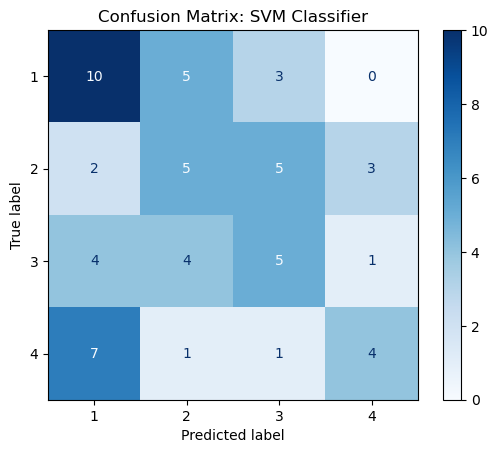

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#accuracy is taken from above
print("accuracy with best parameters:", accuracy)

best_svc = clf.best_estimator_ #used chat gpt "how do i pull the best estimation used" 4/24/25
y_pred = best_svc.predict(x_test_svm)

#paramters for the confusion matrix 
cm = confusion_matrix(y_test_svm, y_pred, labels=best_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc.classes_)

#plotting
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: SVM Classifier")
plt.show()


Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> I would say it works better as in .08% higher accuracy but also atleast for my computer was much faster than training the perceptron.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




In [ ]:
# put your code here



Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University